In [1]:
# Clustering with the Iris Dataset

# Using this lesson as a guide, perform clustering on the iris dataset.

# Choose features other than the ones used in the lesson.
# Visualize the results of your clustering.
# Use the elbow method to visually select a good value for k.
# Repeat the clustering, this time with 3 different features.

In [2]:
import pandas as pd
import numpy as np
import os
from env import user, host, password
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import newwrangle as w
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN
from pydataset import data

In [3]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

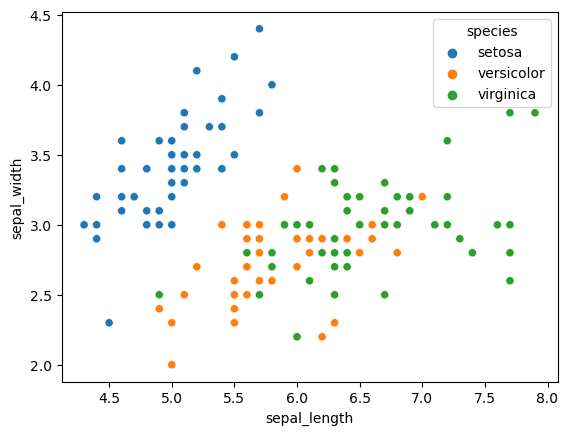

In [5]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

In [6]:
X = df[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [8]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

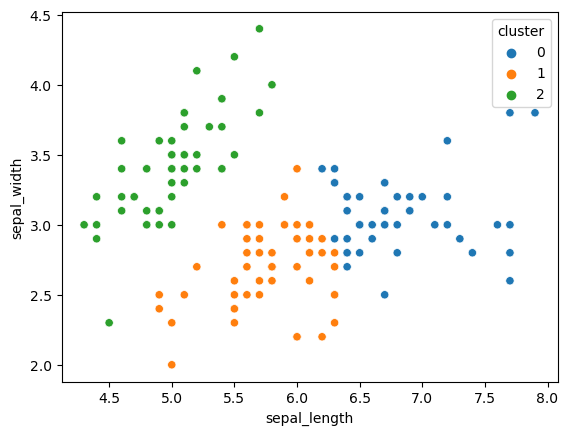

In [9]:
# Visualize the results of your clustering.

sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=df, palette='tab10')


[Text(0.5, 1.0, 'K-Means Clusters')]

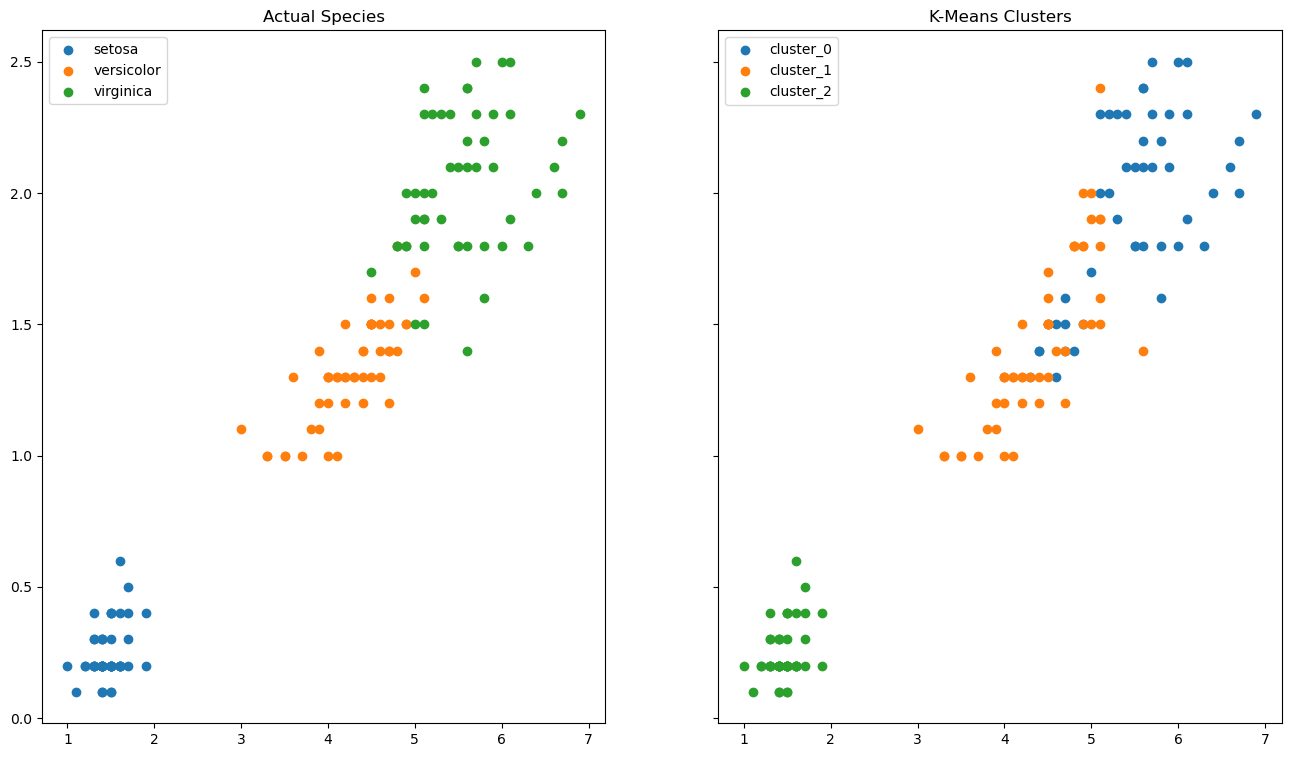

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

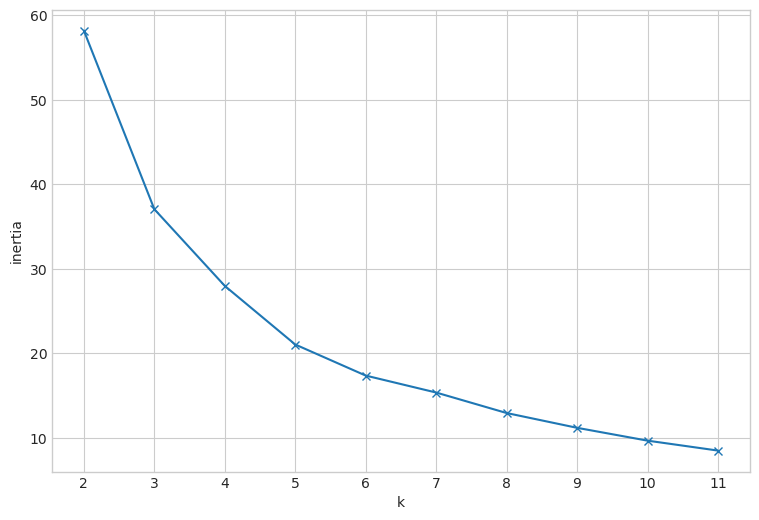

In [11]:
# Use the elbow method to visually select a good value for k.

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


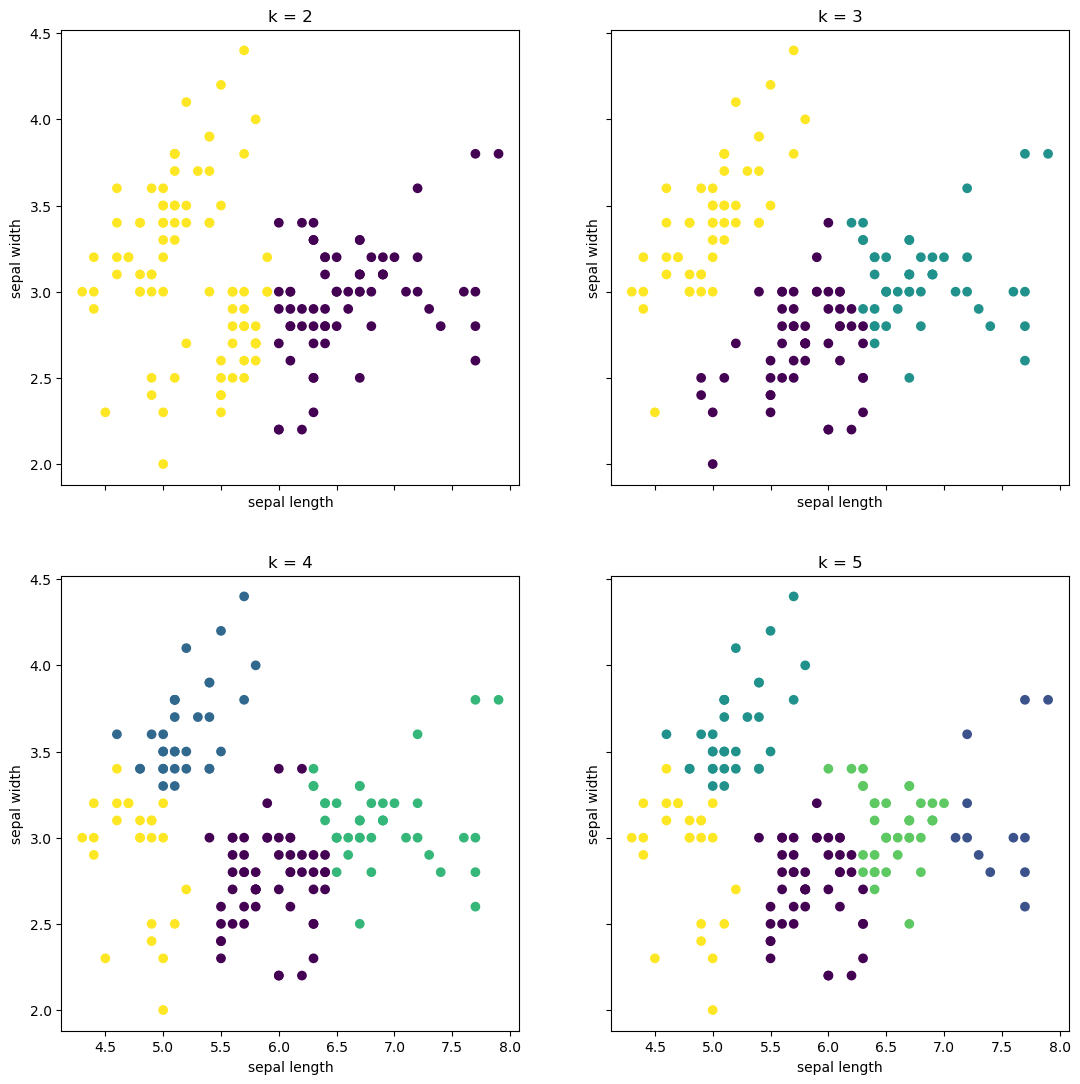

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

In [13]:
# Repeat the clustering, this time with 3 different features.

X = df[['sepal_length', 'sepal_width', 'petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

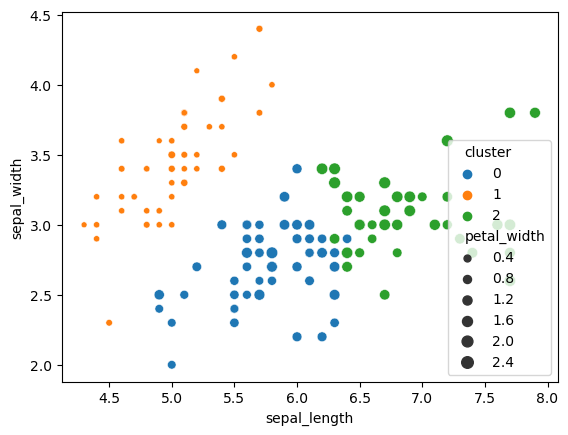

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', size='petal_width', data=df, palette='tab10')

In [16]:
# Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset.
# Be sure to visualize your results!

train, validate, test = w.wrangle_mall('mall_customers')
train.head()

Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled
customer_id,,,,,,,
27,Female,45,28,32,0.519231,0.106557,0.294737
24,Male,31,25,73,0.250000,0.081967,0.726316
40,Female,20,37,75,0.038462,0.180328,0.747368
38,Female,30,34,73,0.230769,0.155738,0.726316
57,Female,51,44,50,0.634615,0.237705,0.484211


<Axes: xlabel='annual_income_scaled', ylabel='age_scaled'>

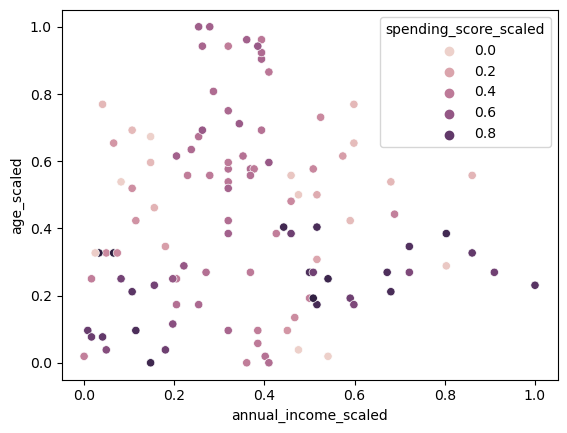

In [17]:
sns.scatterplot(x='annual_income_scaled', y='age_scaled', hue='spending_score_scaled', data=train)

In [19]:
X = train[['annual_income_scaled', 'age_scaled']]
X.head()

,annual_income_scaled,age_scaled
customer_id,,
27,0.106557,0.519231
24,0.081967,0.250000
40,0.180328,0.038462
38,0.155738,0.230769
57,0.237705,0.634615


In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
train['cluster'] = clusters

<Axes: xlabel='annual_income_scaled', ylabel='age_scaled'>

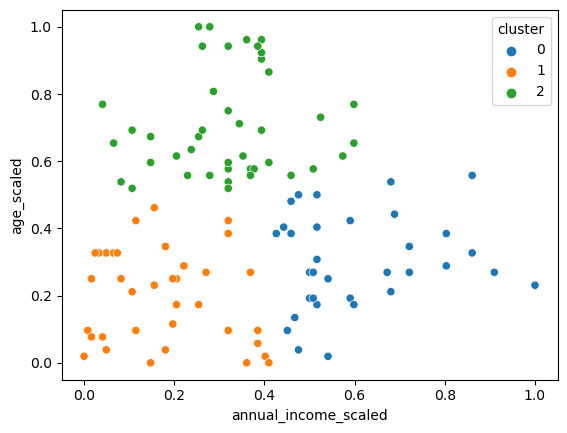

In [25]:
sns.scatterplot(x='annual_income_scaled', y='age_scaled', hue='cluster', data=train, palette='tab10')


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

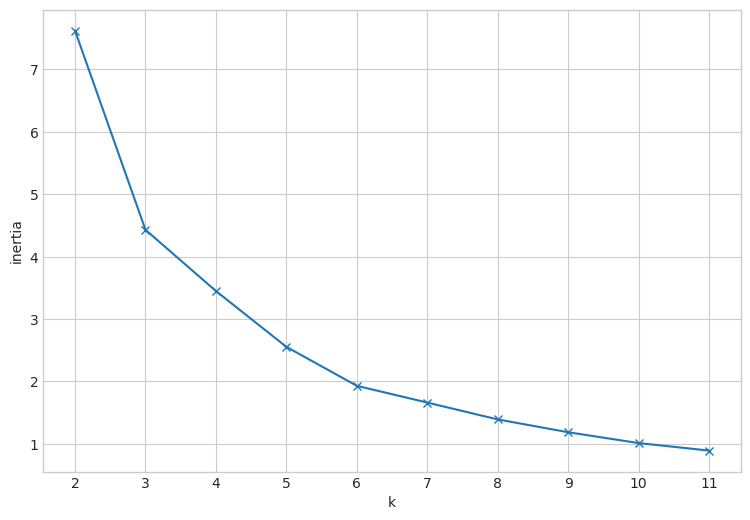

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')

In [27]:
# 5 looks better

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='annual_income_scaled', ylabel='age_scaled'>

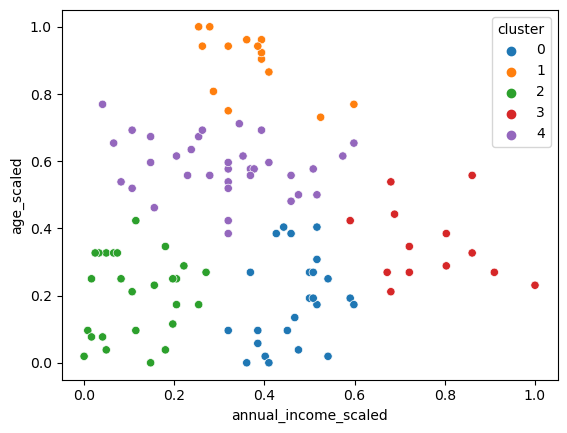

In [28]:
sns.scatterplot(x='annual_income_scaled', y='age_scaled', hue='cluster', data=train, palette='tab10')


In [29]:
# How does scaling impact the results of clustering?

# Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). 
# You can show how the resulting clusters differ either with descriptive statistics or visually.

X = train[['annual_income', 'age']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='annual_income', ylabel='age'>

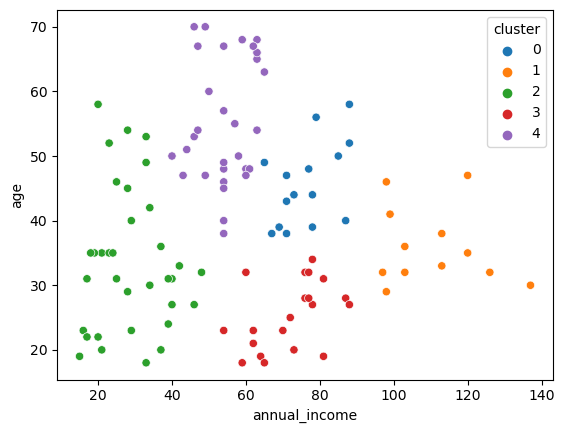

In [30]:
sns.scatterplot(x='annual_income', y='age', hue='cluster', data=train, palette='tab10')

In [ ]:
# the clusters are different when scaled

In [38]:
df = pd.read_csv('cluster_data.csv')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 17, saw 847
